In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from selectinf.Simulation.spline import cubic_spline
from selectinf.Simulation.spline_instance import generate_gaussian_instance
from selectinf.group_lasso_query import (group_lasso,
                                         split_group_lasso)
from selectinf.Simulation.instance import gaussian_group_instance

from selectinf.Simulation.test_group_lasso_simulation import (calculate_F1_score,
                                                              naive_inference,
                                                              randomization_inference_fast,
                                                              data_splitting)

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')


In [3]:
import regreg.api as rr
from selectinf.base import restricted_estimator
import scipy.stats

In [4]:
X = np.random.normal(size=(2000,10), scale = 5)
cs = cubic_spline(data_nl=X[:,0:10], nknots=5)

In [5]:
cs.construct_splines(equally_spaced=False,use_quantiles=True)

Equally spaced quantile knots used.


In [6]:
cs.get_spline_data().shape[1]

80

In [7]:
cs.get_groups()

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9])

In [46]:
signal_fac = 0.05

const, const_split = group_lasso.gaussian, split_group_lasso.gaussian

X, Y, beta, groups = generate_gaussian_instance(intercept=False,
                                        linear_mean=0,
                                        linear_sd=1,
                                        nonlinear_mean=0,
                                        nonlinear_sd=1,
                                        n=2000, p_nl=20, p_l=0, order=3,
                                        s_nl = 5, s_l = 0, nknots=3,
                                        signal_fac=0.1, random_signs=True,
                                        center=True, scale=True)

Equally spaced quantile knots used.


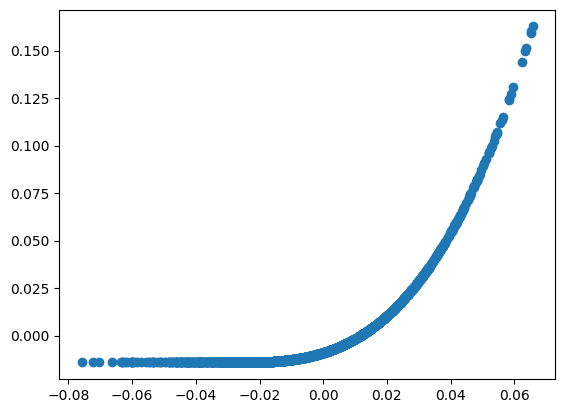

In [47]:
plt.scatter(X[:,0],X[:,3])

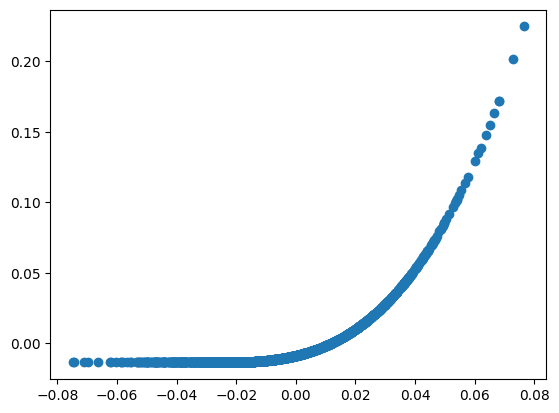

In [34]:
plt.scatter(X[:,0],X[:,3])

In [35]:
np.std(X,axis=0)

array([0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236

In [36]:
print(np.diag(np.linalg.inv(X.T @ X)))

[1.91071280e+03 1.78724846e+03 5.47910835e+02 7.37771067e+03
 2.73526835e+02 1.54738325e+01 1.71478082e+03 1.59751184e+03
 4.72014088e+02 6.86079924e+03 2.46521067e+02 1.04373092e+01
 1.55050838e+03 1.64875677e+03 5.75709561e+02 7.15064063e+03
 3.57942205e+02 2.40733315e+01 4.11601666e+03 3.63505650e+03
 1.07868901e+03 1.46627595e+04 2.69161740e+02 9.88172663e+00
 1.85226307e+03 1.87939911e+03 5.93130783e+02 7.75310547e+03
 3.12476515e+02 1.69715470e+01 9.94858470e+02 8.13559982e+02
 2.11335761e+02 3.82558752e+03 2.05041467e+02 9.19077804e+00
 1.60451224e+03 1.40353184e+03 4.08108467e+02 5.81334294e+03
 2.22698226e+02 1.15536690e+01 6.25518035e+02 5.71541453e+02
 1.56754909e+02 2.91613407e+03 2.15944020e+02 1.02134071e+01
 1.82043674e+03 1.47811448e+03 4.09154932e+02 5.77399568e+03
 1.99972177e+02 8.23024717e+00 2.61583535e+03 2.70553402e+03
 8.94947456e+02 1.22365535e+04 3.45898999e+02 1.26820364e+01
 9.29770352e+02 7.48505296e+02 1.98986223e+02 2.90725990e+03
 1.58010942e+02 8.969705

In [37]:
X.T @ X

array([[ 1.00000000e+00, -2.10043137e-02,  7.75053657e-01, ...,
         1.16418020e-02,  7.53504165e-03,  8.42169097e-03],
       [-2.10043137e-02,  1.00000000e+00, -1.67997739e-02, ...,
         7.49066547e-03,  3.27399953e-04, -3.45079425e-03],
       [ 7.75053657e-01, -1.67997739e-02,  1.00000000e+00, ...,
         3.08270591e-02,  2.68477407e-02,  2.25040804e-02],
       ...,
       [ 1.16418020e-02,  7.49066547e-03,  3.08270591e-02, ...,
         1.00000000e+00,  9.25993411e-01,  6.58220879e-01],
       [ 7.53504165e-03,  3.27399953e-04,  2.68477407e-02, ...,
         9.25993411e-01,  1.00000000e+00,  8.55337021e-01],
       [ 8.42169097e-03, -3.45079425e-03,  2.25040804e-02, ...,
         6.58220879e-01,  8.55337021e-01,  1.00000000e+00]])

In [38]:
print(X*np.sqrt(2000))

[[-0.17821637 -0.68196219  0.00431346 ... -0.2770581  -0.32241501
  -0.12983307]
 [ 0.59218708 -0.44919942  0.06094681 ... -0.64544737 -0.32512807
  -0.12983307]
 [ 0.25835579 -0.65240406  0.01041672 ... -0.64584889 -0.32512807
  -0.12983307]
 ...
 [ 0.08220489 -0.69654402  0.0057614  ... -0.64584889 -0.32512807
  -0.12983307]
 [-1.30482098  0.47844387 -0.55244816 ... -0.64584889 -0.32512807
  -0.12983307]
 [ 0.83102601 -0.20776903  0.15682021 ...  0.5157537  -0.00281416
  -0.12983307]]


In [48]:
n, p = X.shape
noselection = False  # flag for a certain method having an empty selected set

if not noselection:
    # MLE inference
    coverage, length, beta_target, nonzero, conf_low, conf_up = \
        randomization_inference_fast(X=X, Y=Y, n=n, p=p, proportion=0.67,
                                     beta=beta, groups=groups, weight_frac=1.5)
    # print(MLE_runtime)
    noselection = (coverage is None)

if not noselection:
    # data splitting
    coverage_ds, lengths_ds, conf_low_ds, conf_up_ds, nonzero_ds, beta_target_ds = \
        data_splitting(X=X, Y=Y, n=n, p=p, beta=beta, groups=groups,
                       proportion=0.67, level=0.9, weight_frac=1.5)
    noselection = (coverage_ds is None)

if not noselection:
    # naive inference
    coverage_naive, lengths_naive, nonzero_naive, conf_low_naive, conf_up_naive, \
    beta_target_naive = \
        naive_inference(X=X, Y=Y, groups=groups,
                        beta=beta, const=const,
                        n=n, level=0.9, weight_frac=1.5)
    noselection = (coverage_naive is None)


if not noselection:
    # F1 scores
    # F1_s = calculate_F1_score(beta, selection=nonzero_s)
    F1 = calculate_F1_score(beta, selection=nonzero)
    F1_ds = calculate_F1_score(beta, selection=nonzero_ds)
    F1_naive = calculate_F1_score(beta, selection=nonzero_naive)

# MLE coverage
print("MLE")
print("coverage rate:", np.mean(coverage))
print("avg length", np.mean(length))
print("F1 score", np.mean(F1))

# Data splitting coverage
print("Data splitting")
print("coverage rate:", np.mean(coverage_ds))
print("avg length", np.mean(lengths_ds))
print("F1 score", np.mean(F1_ds))

# Naive coverage
print("Naive inference")
print("coverage rate:", np.mean(coverage_naive))
print("avg length", np.mean(lengths_naive))
print("F1 score", np.mean(F1_naive))

MLE |E|: 18
Naive selection [9, 12, 14]
Naive |E|: 18
MLE
coverage rate: 1.0
avg length 169.7170547191946
F1 score 0.5
Data splitting
coverage rate: 0.8333333333333334
avg length 279.47132907199716
F1 score 0.5714285714285715
Naive inference
coverage rate: 1.0
avg length 92.43222089217443
F1 score 0.5


In [32]:
X.T @ X

array([[ 1.        , -0.02215958,  0.89376289, ..., -0.00532008,
        -0.01132144, -0.01152655],
       [-0.02215958,  1.        ,  0.41894887, ..., -0.00831698,
        -0.00942212, -0.02615538],
       [ 0.89376289,  0.41894887,  1.        , ..., -0.00773951,
        -0.01220949, -0.02031437],
       ...,
       [-0.00532008, -0.00831698, -0.00773951, ...,  1.        ,
         0.9371484 ,  0.55043316],
       [-0.01132144, -0.00942212, -0.01220949, ...,  0.9371484 ,
         1.        ,  0.70920294],
       [-0.01152655, -0.02615538, -0.02031437, ...,  0.55043316,
         0.70920294,  1.        ]])

In [33]:
X[:,nonzero].T @ X[:,nonzero]

array([[ 1.00000000e+00,  4.33940338e-02,  8.91104850e-01,
         7.41762073e-01,  3.53778104e-01,  2.03803202e-02,
        -3.98369337e-02,  3.28582901e-03,  3.49265360e-03,
         2.53357840e-02,  1.08610375e-02, -1.08502630e-02,
         4.78480315e-03,  1.49791395e-03,  1.40101333e-02,
         4.18723126e-03,  2.31463513e-02,  1.23959933e-02,
         1.15168797e-02,  7.00484009e-03],
       [ 4.33940338e-02,  1.00000000e+00,  4.81129039e-01,
         6.14452159e-01,  4.29782770e-01,  5.66926089e-03,
         2.56178150e-03,  5.46968413e-03,  6.14284475e-03,
         2.61650439e-02, -1.44202038e-02, -3.27991014e-02,
        -2.76983233e-02, -2.83126022e-02, -2.46039722e-02,
         4.43088821e-02, -3.64318650e-02,  2.76840186e-02,
         2.41871161e-02,  2.31887772e-02],
       [ 8.91104850e-01,  4.81129039e-01,  1.00000000e+00,
         9.50582429e-01,  5.42861704e-01,  2.11117436e-02,
        -3.56334208e-02,  4.91971564e-03,  4.43756529e-03,
         3.39125207e-02,  2.8

In [32]:

weight_frac = 2.
level = 0.9
n, p = X.shape

##estimate noise level in data

sigma_ = np.std(Y)
if n > p:
    dispersion = np.linalg.norm(Y - X.dot(np.linalg.pinv(X).dot(Y))) ** 2 / (n - p)
else:
    dispersion = sigma_ ** 2

sigma_ = np.sqrt(dispersion)

print(sigma_)

##solve group LASSO with group penalty weights = weights
weights = dict([(i, weight_frac * sigma_ * np.sqrt(2 * np.log(p))) for i in np.unique(groups)])

conv = const(X=X,
             Y=Y,
             groups=groups,
             weights=weights,
             useJacobian=False,
             perturb=np.zeros(p),
             ridge_term=0.)

signs, _ = conv.fit()
nonzero = signs != 0

print('Naive selection', conv._ordered_groups)

if nonzero.sum() > 0:
    # E: nonzero flag
    X_E = X[:, nonzero]
    E_size = nonzero.sum()

    print("Naive |E|:", E_size)

    loglike = rr.glm.gaussian(X, Y)
    # For LASSO, this is the OLS solution on X_{E,U}
    beta_MLE = restricted_estimator(loglike, nonzero)

    def solve_target_restricted():
        Y_mean = X.dot(beta)
        loglike = rr.glm.gaussian(X, Y_mean)
        # For LASSO, this is the OLS solution on X_{E,U}
        _beta_unpenalized = restricted_estimator(loglike,
                                                 nonzero)
        return _beta_unpenalized

    target = solve_target_restricted()

    f_info = X_E.T @ X_E
    cov = np.linalg.inv(f_info) * dispersion

    # Standard errors
    sd = np.sqrt(np.diag(cov))
    print(sd)

    # Normal quantiles
    qt_low = scipy.stats.t.ppf((1 - level) / 2, df=n-E_size)
    qt_up = scipy.stats.t.ppf(1 - (1 - level) / 2, df=n-E_size)
    assert np.abs(np.abs(qt_low) - np.abs(qt_up)) < 10e-6

    # Construct confidence intervals
    intervals_low = beta_MLE + qt_low * sd
    intervals_up = beta_MLE + qt_up * sd

    coverage = (target > intervals_low) * (target < intervals_up)

5.0128292155236105
Naive selection [5]
Naive |E|: 13
[  749.17237796   604.36270132   288.12176209  5074.40533159
 12866.12709655 18008.01264392 18317.85927483 18192.01757064
 14343.33380224  8690.39446079  4406.02739022  1271.23404503
   190.3425974 ]


In [15]:
print(beta_MLE)

[-1139.27191204  -779.92648741  -327.21323392  5300.32279707
 -4155.06142288  -653.24715816  1733.5560578   -911.67285305
  -143.87597439  1209.87858306  -961.40669929   268.91733375
   -23.05655648  -386.40875534  -363.57792     -168.44190529
  2035.36396596 -1735.97840146   693.90166728 -1466.13986153
  1237.43240657    -6.06979743   354.43161266  -543.17392244
   -45.63582363   111.00617207  -102.04083136    31.45994688
    28.49357323  2421.59458704 -4418.58994186  -447.08452205
  3605.68415448   599.26901169 -2462.26682805   605.7886778
   272.28298418  -149.24457232    17.95368973    84.2820362
    48.04336929     7.32450024  -675.19628155   441.2445298
  1103.05976479  -418.25278765 -1944.03197584  1487.00028186
   358.84873932  -790.58595579   379.80355113   -56.164908  ]


In [17]:
print(X@beta)

[-0.02443765  0.07022621  1.13795477 ... -0.17703128 -0.02155262
  0.03299237]


In [20]:
print(X[:,nonzero]@beta[nonzero])

[-0.02443765  0.07022621  1.13795477 ... -0.17703128 -0.02155262
  0.03299237]


In [22]:
print(X[:,nonzero]@beta_MLE)

[ 0.72872748 -0.03716202  1.11792035 ... -0.16123383 -0.27843885
 -0.2409979 ]


In [10]:
beta_target

array([ 2.46262128,  2.4071523 , -2.11568503,  1.55788537,  0.98150824,
        0.96637524,  1.20346981,  1.2972088 ,  0.9056997 ,  0.43588192,
        0.87538884,  2.45244355, -2.23232163,  1.76554436, -2.53267722,
       -2.35111432,  0.04063522,  0.47021253,  0.56714312,  0.61888311,
        1.08468262,  2.08535337,  2.72513043,  1.57200322, -1.83770557,
        2.12447605,  2.24740038, -2.17504542,  2.22009838,  2.39290004,
        0.92186693, -0.7961473 , -1.12813373,  0.07121399,  2.168155  ,
        3.31050741,  1.96653229, -2.40620686,  2.26520778])

In [19]:
inst  = gaussian_group_instance
groups = np.arange(50).repeat(4)
X, Y, beta = inst(n=2000,
                  p=200,
                  signal=signal,
                  sgroup=5,
                  groups=groups,
                  ndiscrete=4,
                  nlevels=5,
                  sdiscrete=2, # How many discrete rvs are not null
                  equicorrelated=False,
                  rho=0.3,
                  random_signs=True)[:3]

In [20]:
np.std(X,axis=0)

array([0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236068,
       0.02236068, 0.02236068, 0.02236068, 0.02236068, 0.02236

In [21]:
print(X*np.sqrt(n))

[[ 2.55942885  0.          0.         ... -0.83527287 -0.60230535
  -0.19847227]
 [ 0.          2.50470858  0.         ... -0.09999547 -0.33193576
  -0.58927548]
 [ 2.55942885  0.          0.         ...  0.99180226  1.57352323
  -0.92911875]
 ...
 [ 0.          2.50470858  0.         ... -1.79244499 -1.68472996
  -1.17199036]
 [ 0.          0.          0.         ...  0.97453371  1.38431904
  -0.55341712]
 [ 2.55942885  0.          0.         ... -0.06431691 -0.57307728
   0.23824544]]


In [33]:
n, p = X.shape
noselection = False  # flag for a certain method having an empty selected set

if not noselection:
    # MLE inference
    coverage, length, beta_target, nonzero, conf_low, conf_up = \
        randomization_inference_fast(X=X, Y=Y, n=n, p=p, proportion=0.67,
                                     beta=beta, groups=groups, weight_frac=1)
    # print(MLE_runtime)
    noselection = (coverage is None)

if not noselection:
    # data splitting
    coverage_ds, lengths_ds, conf_low_ds, conf_up_ds, nonzero_ds, beta_target_ds = \
        data_splitting(X=X, Y=Y, n=n, p=p, beta=beta, groups=groups,
                       proportion=0.67, level=0.9, weight_frac=1)
    noselection = (coverage_ds is None)

if not noselection:
    # naive inference
    coverage_naive, lengths_naive, nonzero_naive, conf_low_naive, conf_up_naive, \
    beta_target_naive = \
        naive_inference(X=X, Y=Y, groups=groups,
                        beta=beta, const=const,
                        n=n, level=0.9, weight_frac=1)
    noselection = (coverage_naive is None)

MLE |E|: 60


KeyboardInterrupt: 

In [34]:
def generate_polynomial(n = 2000, p = 10, s = 3, order = 3, center=True, scale=True,
                        signal = 5., random_signs = True):
    data = np.zeros((n, p*order))
    for i in range(p):
        x_i = np.random.normal(size = (n,))
        data[:,3*i:3*i+3] = np.array([x_i,x_i**2,x_i**3]).T

    groups = np.arange(p).repeat(order)
    group_labels = np.unique(groups)

    # Assigning active groups
    # Assuming no intercept
    group_active = np.random.choice(np.arange(p), s, replace=False)

    beta = np.zeros(data.shape[1])
    signal = np.atleast_1d(signal)

    active = np.isin(groups, group_active)

    if signal.shape == (1,):
        beta[active] = signal[0]
    else:
        beta[active] = np.linspace(signal[0], signal[1], active.sum())
    if random_signs:
        beta[active] *= (2 * np.random.binomial(1, 0.5, size=(active.sum(),)) - 1.)
    beta /= np.sqrt(n)

    if center:
        data -= data.mean(0)[None, :]

    if scale:
        # ----SCALE----
        # scales X by sqrt(n) and sd
        # if we need original X, uncomment the following line
        # X_raw = X
        # ----SCALE----
        scaling = data.std(0) * np.sqrt(n)
        data /= scaling[None, :]
        beta *= np.sqrt(n)

    Y = (data.dot(beta)) + np.random.normal(size = (n,))

    return data, Y, beta, groups

In [51]:
X, Y, beta, groups = generate_polynomial()
n, p = X.shape
noselection = False  # flag for a certain method having an empty selected set

if not noselection:
    # MLE inference
    coverage, length, beta_target, nonzero, conf_low, conf_up = \
        randomization_inference_fast(X=X, Y=Y, n=n, p=p, proportion=0.67,
                                     beta=beta, groups=groups, weight_frac=1)
    # print(MLE_runtime)
    noselection = (coverage is None)

if not noselection:
    # data splitting
    coverage_ds, lengths_ds, conf_low_ds, conf_up_ds, nonzero_ds, beta_target_ds = \
        data_splitting(X=X, Y=Y, n=n, p=p, beta=beta, groups=groups,
                       proportion=0.67, level=0.9, weight_frac=1)
    noselection = (coverage_ds is None)

if not noselection:
    # naive inference
    coverage_naive, lengths_naive, nonzero_naive, conf_low_naive, conf_up_naive, \
    beta_target_naive = \
        naive_inference(X=X, Y=Y, groups=groups,
                        beta=beta, const=const,
                        n=n, level=0.9, weight_frac=1)
    noselection = (coverage_naive is None)

if not noselection:
    # F1 scores
    # F1_s = calculate_F1_score(beta, selection=nonzero_s)
    F1 = calculate_F1_score(beta, selection=nonzero)
    F1_ds = calculate_F1_score(beta, selection=nonzero_ds)
    F1_naive = calculate_F1_score(beta, selection=nonzero_naive)

# MLE coverage
print("MLE")
print("coverage rate:", np.mean(coverage))
print("avg length", np.mean(length))
print("F1 score", np.mean(F1))

# Data splitting coverage
print("Data splitting")
print("coverage rate:", np.mean(coverage_ds))
print("avg length", np.mean(lengths_ds))
print("F1 score", np.mean(F1_ds))

# Naive coverage
"""print("Naive inference")
print("coverage rate:", np.mean(coverage_naive))
print("avg length", np.mean(lengths_naive))
print("F1 score", np.mean(F1_naive))"""

MLE |E|: 12
0.9851474472261652
Naive selection [2, 7, 8]
Naive |E|: 9
[1.61613262 0.99308378 1.62331765 1.57900789 0.99244198 1.58195495
 1.60442498 0.98790466 1.60532864]
MLE
coverage rate: 0.8333333333333334
avg length 7.624213509262494
F1 score 0.8571428571428571
Data splitting
coverage rate: 0.5833333333333334
avg length 7.481003547163758
F1 score 0.8571428571428571


'print("Naive inference")\nprint("coverage rate:", np.mean(coverage_naive))\nprint("avg length", np.mean(lengths_naive))\nprint("F1 score", np.mean(F1_naive))'

-4.443297983999999